# Welcome to Full Stack Machine Learning's Week 1 Project!

Welcome to our project on sentiment analysis using a [Women's Ecommerce Clothing Reviews Dataset from Kaggle](https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews)! As a Data Scientist, you'll often be tasked with building predictive models that help businesses understand their customers' needs and preferences. In this project, our main goal is to understand the importance of creating a baseline model as a starting point for further improvements.

To achieve this goal, we'll be using a dataset containing reviews written by customers about women's clothing sold online. The dataset offers a great environment to parse out the text through its multiple dimensions, and because this is real commercial data, it has been anonymized, and references to the company in the review text and body have been replaced with "retailer".

As part of the project, we'll start by exploring the dataset, performing some basic cleaning, and establishing a baseline model using a simple algorithm. We'll then discuss the importance of this baseline model and how it can be used as a reference point for future improvements.

Optionally, we'll also be creating a simple model that performs better than the baseline model. This will give us a better understanding of how machine learning models work and the benefits of using more complex algorithms.

We're excited to embark on this project together and look forward to exploring the world of sentiment analysis with you!

### Using GitHub
To complete the assignment:
1. Fill in the TODO sections of this notebook.
2. Push the results to your `full-stack-ml-metaflow-corise-week-1` repository.
3. Create a link to the repository in Corise.

## Task 1. EDA

Exploratory Data Analysis (EDA) is a critical step in the data science pipeline as it allows us to gain insights and identify patterns within the data. In this section, we will be performing EDA on the Women's Clothing E-Commerce dataset, which contains reviews written by customers. Through this process, we will be looking out for trends, anomalies, and outliers that can help us better understand the data and inform our decision-making in subsequent stages of the project. By performing EDA, we will be able to identify potential issues with the dataset and make necessary corrections before proceeding to the model building phase.

Suggestion: Spend 1-2 hours on this section.

### Import Dependencies
You can change these if you wish! 
These packages are already installed in the `full-stack-metaflow-corise` environment. 
If you are feeling adventurous, you can install other packages you want in the conda environment too, or even make your own environment from scratch and include with your submission! 

In [1]:
from collections import Counter
import pandas as pd
import numpy as np 
from termcolor import colored
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk

### Configure plots
This part is optional styling your plots and cards.

In [2]:
YELLOW = '#FFBC00'
GREEN = '#37795D'
PURPLE = '#5460C0'
BACKGROUND = '#F4EBE6'
colors = [GREEN, PURPLE]
custom_params = {
    'axes.spines.right': False, 'axes.spines.top': False,
    'axes.facecolor':BACKGROUND, 'figure.facecolor': BACKGROUND, 
    'figure.figsize':(8, 8)
}
sns_palette = sns.color_palette(colors, len(colors))
sns.set_theme(style='ticks', rc=custom_params)

### Load the data 

In [3]:
# TODO: Load the dataset, ensure to use index_col=0 when reading the CSV file. 
# Hints
    # Look in the ../../data directory of this worksapce. 
    # If you use pandas think about the index_col arg 🧐 

#SOLUTION
#Get data path: get main wdir and look for the dataset so that this code snipet can be run 
# at different levels in the main wd
import pathlib
cwd = pathlib.Path.cwd()
main_wd = pathlib.Path("/home/workspace/workspaces/full-stack-ml-metaflow-corise-week-1")
data_path = next(iter(pathlib.Path(f'{main_wd}').rglob('Womens Clothing E-Commerce Reviews.csv')))

df = pd.read_csv(data_path, index_col = 0)

# light data cleaning
df.columns = ["_".join(name.lower().strip().split()) for name in df.columns]
df['review_text'] = df['review_text'].astype('str')

In [4]:
df.head()

,clothing_id,age,title,review_text,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   clothing_id              23486 non-null  int64 
 1   age                      23486 non-null  int64 
 2   title                    19676 non-null  object
 3   review_text              23486 non-null  object
 4   rating                   23486 non-null  int64 
 5   recommended_ind          23486 non-null  int64 
 6   positive_feedback_count  23486 non-null  int64 
 7   division_name            23472 non-null  object
 8   department_name          23472 non-null  object
 9   class_name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [6]:
df.describe()

,clothing_id,age,rating,recommended_ind,positive_feedback_count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


### Plot the distribution of [1, 5] ratings

We will be using the `rating` to create a label on this dataset. We can see that the mean rating is above 4, pretty happy customers!

Let's try to visualise the distrbution of the label. 

<BarContainer object of 5 artists>

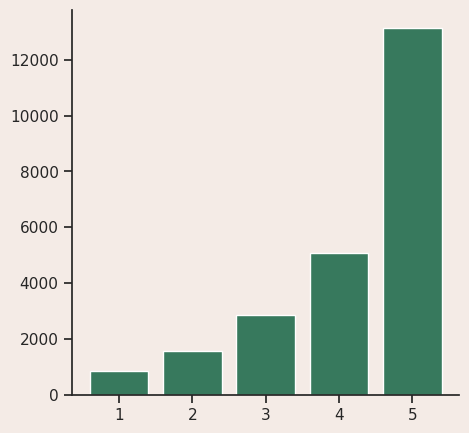

In [7]:
# TODO: Derive the rating_distribution and plot it
rating_distribution = df['rating'].value_counts()
fig, ax = plt.subplots(1,1,figsize=(5,5))
# You can swap the color used with the defined constants at the top of the notebook
ax.bar(x=rating_distribution.index, height=rating_distribution.values, color=GREEN)

In [8]:
def labeling_function(row):
    """
    A function to derive labels from the user's review data.
    This could use many variables, or just one. 
    In supervised learning scenarios, this is a very important part of determining what the machine learns!
   
    A subset of variables in the e-commerce fashion review dataset to consider for labels you could use in ML tasks include:
        # rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
        # recommended_ind: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
        # positive_feedback_count: Positive Integer documenting the number of other customers who found this review positive.

    In this case, we are doing sentiment analysis. 
    To keep things simple, we use the rating only, and return a binary positive or negative sentiment score based on an arbitrarty cutoff. 
    """
    # TODO: Add your logic for the labelling function here
    # It is up to you on what value to choose as the cut off point for the postive class
    # A good value to start would be 4
    # This function should return either a 0 or 1 depending on the rating of a particular row

    if row['rating'] < 5:
        return 0
    elif row['rating'] == 5:
        return 1

# final features and labels
_has_review_df = df[df['review_text'] != 'nan']
reviews = _has_review_df['review_text']
labels = _has_review_df.apply(labeling_function, axis=1)
has_review_df = pd.DataFrame({'label': labels, **_has_review_df})
del _has_review_df

# a few checks
assert labels.shape == reviews.shape, "Labels and reviews should be equal shape vectors!"
assert not sum([1 if r == 'nan' else 0 for r in reviews]) > 0, "There are `nan` values in the feature set!"

#### What percentage of points does your algorithm label with positive sentiment?

In [9]:
pct_positive_sentiment = labels.sum() / labels.shape[0]
print(f"{round(100*pct_positive_sentiment,3)}% of the labels have positive sentiment.")

55.386% of the labels have positive sentiment.


In [10]:
has_review_df.head()

,label,clothing_id,age,title,review_text,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,1,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


### Let us try to visualise the data that we just labeled depending on the rating. 

In a real world project, iterating at this point is crucial. You need to look through the way your data is labeled, and ensure it is aligned with your intuitive understanding and objectives of the algorithm. There are also automated tools to aid your label cleaning operations, such as [Cleanlab](https://github.com/cleanlab/cleanlab).  

In [11]:
# params
positive_color = 'green'
negative_color = 'red'
N = 10

# fetch subset of data
idxs = np.random.choice(reviews.index, 10, replace=False)
_labels_subset = labels[idxs]
_reviews_subset = reviews[idxs]

# print each sample and color the text by sentiment
for label, review in zip(_labels_subset, _reviews_subset):
    color = negative_color if label == 0 else positive_color
    print(colored(review, color), end='\n\n')

# in a real world project, iterating at this point is crucial.
# you need to look through the way your data is labeled, and ensure it is aligned with your intuitive understanding and objectives of the algorithm.
# there are also automated tools to aid your label cleaning operations, such as: https://github.com/cleanlab/cleanlab

I love this tunic, i wore it with black leggings and boots. it is well made and flowy. i wish it came in more colors.

The blue version of this dress originally caught my eye on-line, but wasn't available in the store, so i tried the green one, mainly for size since everyone said it runs a bit small. i did have to size up one or two sizes. i fell in love with the green dress and bought it. it is so comfortable, great quality fabric (not too thin or too heavy). looks great on. i have received several compliments.

I needed a legging to wear with boots. makes sense that if it is cold enough to wear boots in socal then it is too cold to wear thin leggings. try to find warm leggings....almost impossible until retailer put fleece lined leggings in their catalogue! the leggings have a vertical knitted stripe which elongates the leg and they are warm! perfection in garments is very rare but these leggings are hot.

These weren't what i expected, but i kind of really like them. they have a ver

### What do you think about the text and their corresponding labels?
- Do you think the labels fit the text? 
- If not what do you think we can do to fix it?

We set 5 as the threshold. This yields a more balanced dataset and sets a higher standard 
for an item to be considered in the positive class. We can interpret any item rated 4 or less as having 
at least some improvement margin for a consumer.
In this case the labels seem to fit the text, although setting 4 as the threshold could also work, but we would bucket too many items in the positive class. 
<br>
If the ratings were slightly off, we could change the threshold, but it they didn't match at all we would have to take a deeper look into the data and rething our labeling criteria. 

### Filtering Stop Words
In this part we will be filtering the stop words from the reviews. We remove stopwords in NLP datasets because there are words that do not carry much meaning on their own, and their presence can add noise to the analysis. These words are common and frequently occurring words such as "a", "an", "the", "of", and "and". 

Removing stopwords can improve the accuracy and efficiency of natural language processing tasks, such as sentiment analysis or topic modeling, by reducing the dimensionality of the data and increasing the signal-to-noise ratio. By removing these uninformative words, the resulting dataset may contain more meaningful information that can be used for analysis.

In [12]:
nltk.download('stopwords')
stopwords = list(nltk.corpus.stopwords.words("english"))
non_stopwords = []
for review in reviews: 
    for word in review.split():
        word = word.translate(str.maketrans('', '', string.punctuation))
        if word == '':
            continue
        if not word.lower() in stopwords:
            non_stopwords.append(word)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/workspace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Find the K most common words

In [18]:
K = 25
words, counts = zip(*Counter(non_stopwords).most_common(K))

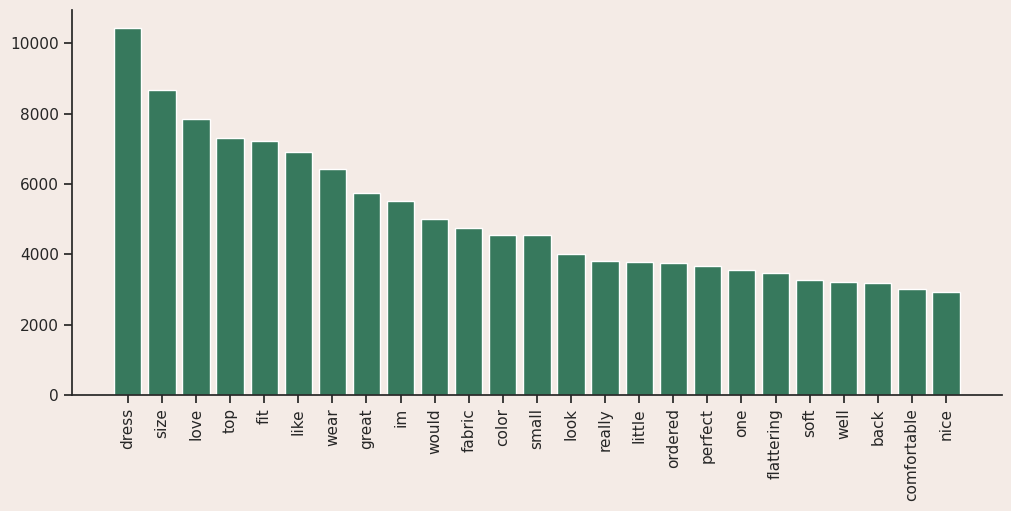

In [19]:
fig,ax = plt.subplots(1,1,figsize=(12,5))
plt.xticks(rotation = 90)
ax.bar(x=words, height=counts, color=GREEN);

### What do the other features in the data look like?

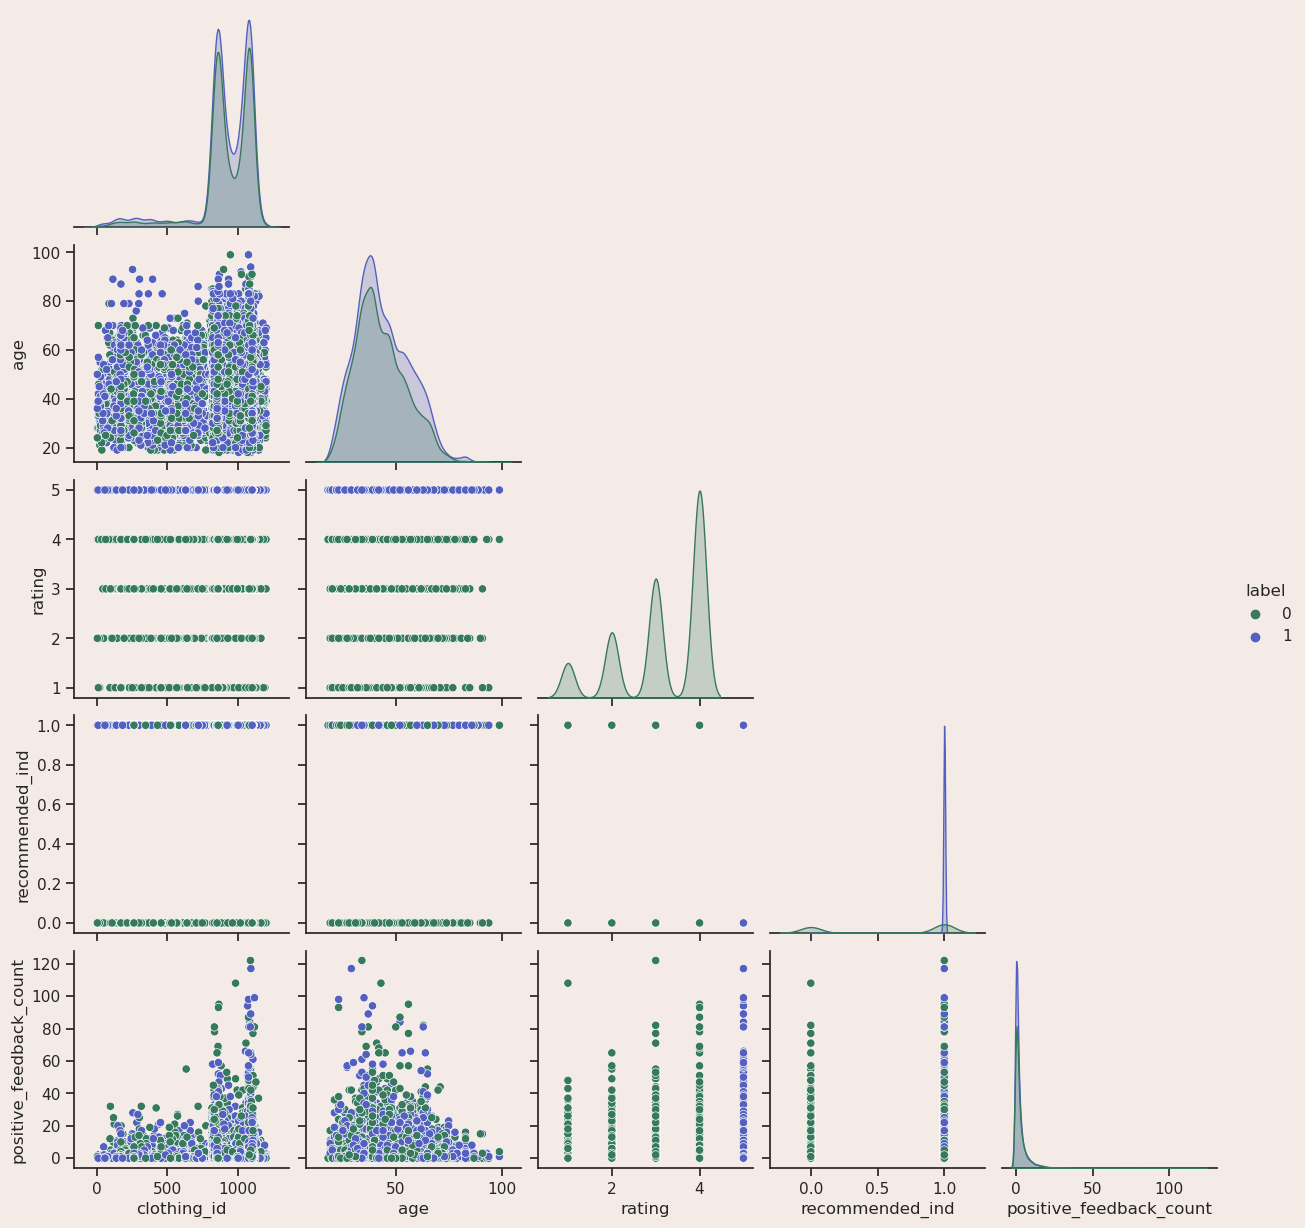

In [20]:
sns.pairplot(data=has_review_df, hue='label', corner=True, palette=sns_palette);

### How many ratings are registered among broader item categories? What are their average labels?

In [60]:
cm = sns.light_palette("#26A5A7", as_cmap=True)

(
    has_review_df
    .groupby('department_name')
    .agg({'label': 'mean', 'rating':'count'})
    .reset_index()
    .rename(columns = {'rating': 'reviews', 'label':'mean_ratings'})
    .sort_values(by = 'reviews', ascending = False)
    .style.background_gradient(cmap=cm)
)

,department_name,mean_ratings,reviews
4,Tops,0.541799,10048
1,Dresses,0.531652,6145
0,Bottoms,0.594211,3662
2,Intimate,0.592257,1653
3,Jackets,0.607784,1002
5,Trend,0.440678,118


### How is age distributed among items?

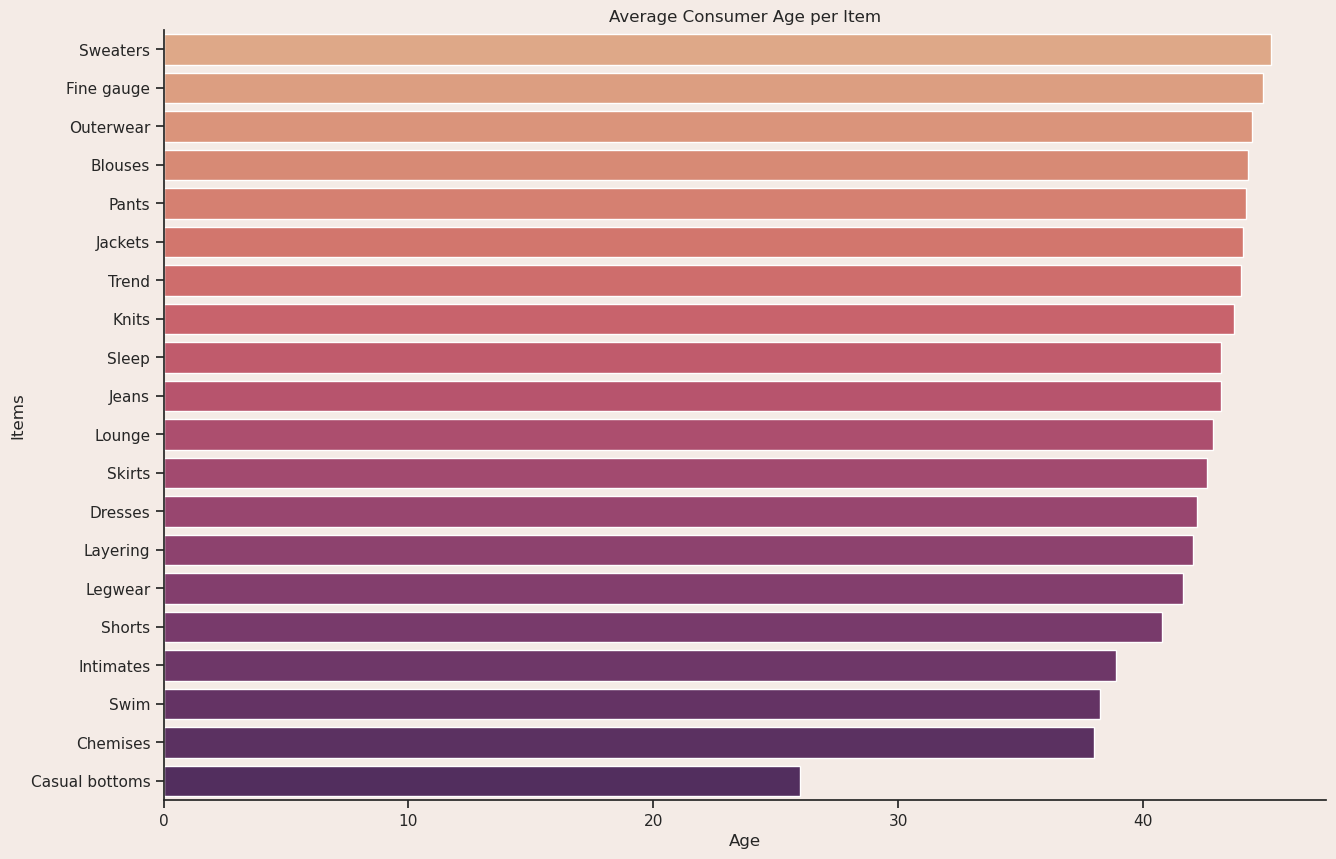

In [59]:
plt.figure(figsize=(15,10))
bp = sns.barplot(data = (has_review_df
                        .groupby('class_name')
                        .agg({'age':'mean'})
                        .reset_index()
                        .sort_values(by = 'age', ascending = False)
                        ),
                x = 'age',
                y = 'class_name',
                palette = 'flare')

bp.set(xlabel='Age', ylabel='Items')
bp.set(title='Average Consumer Age per Item')
plt.show()

### From the most common words from both reviews and review titles, how often do they appear in positive and negative reviews?

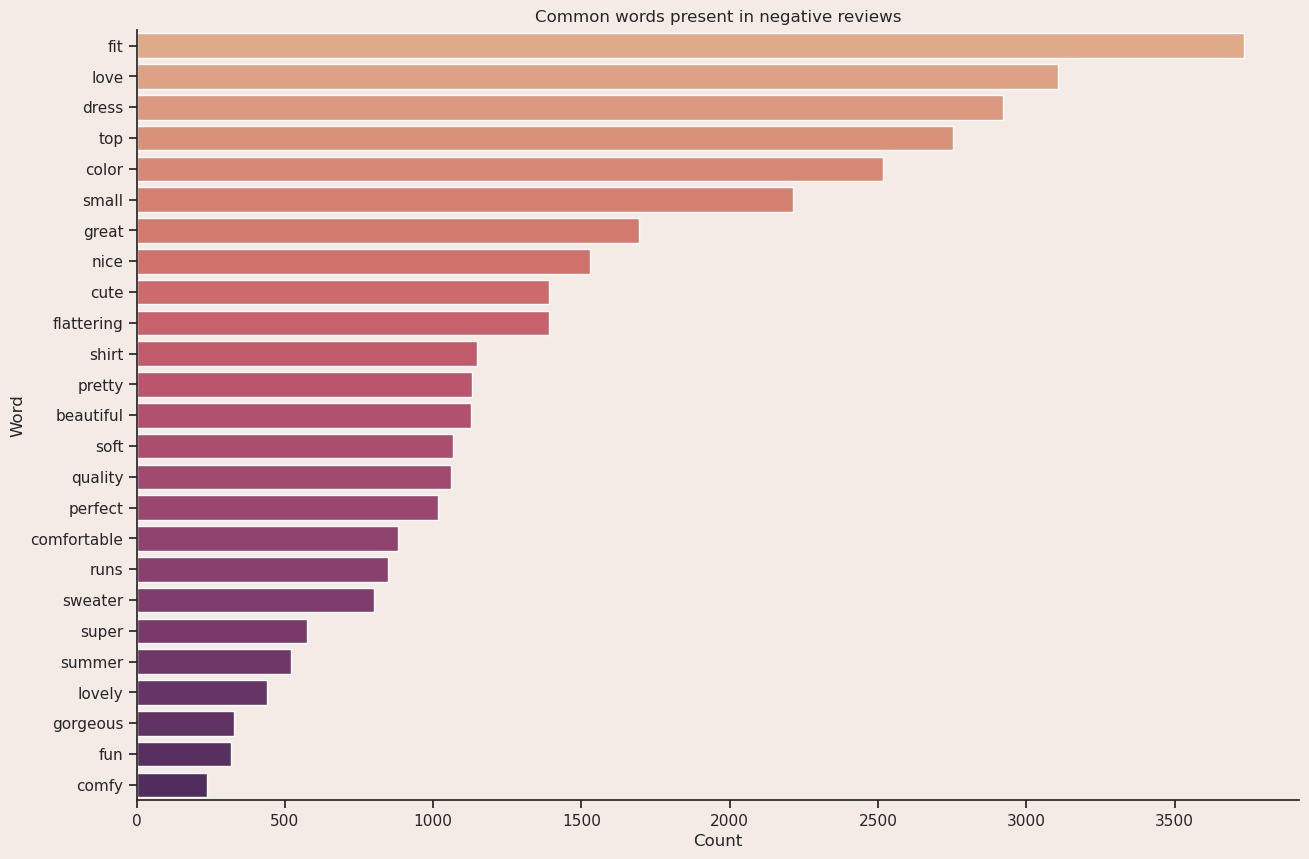

In [77]:
_has_review_df = has_review_df.copy()
for w in words:
    _has_review_df[w] = has_review_df['review_text'].apply(lambda x: int(w in x))

_has_review_df = _has_review_df[list(words) + ['label']]
_has_review_df = _has_review_df.groupby('label').sum().reset_index()
_has_review_df = pd.melt(_has_review_df, id_vars=['label'], value_vars=list(words))

plt.figure(figsize=(15,10))
bp = sns.barplot(data=_has_review_df[_has_review_df['label']==0].sort_values(by = 'value',ascending = False), 
                 x='value', 
                 y='variable', 
                 palette='flare',
            )
bp.set(xlabel='Count', ylabel='Word')
bp.set(title='Common words present in negative reviews')
plt.show()

del _has_review_df

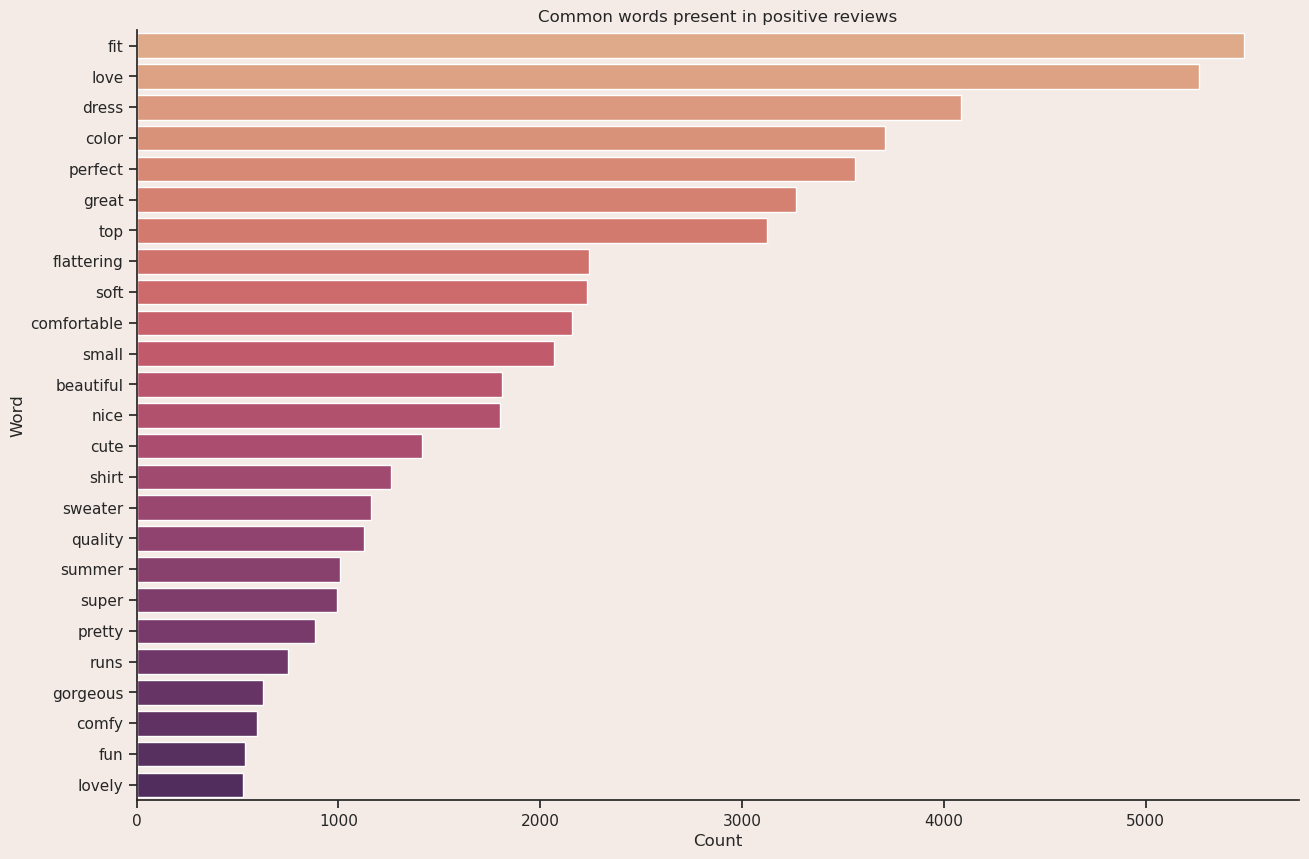

In [79]:
_has_review_df = has_review_df.copy()
for w in words:
    _has_review_df[w] = has_review_df['review_text'].apply(lambda x: int(w in x))

_has_review_df = _has_review_df[list(words) + ['label']]
_has_review_df = _has_review_df.groupby('label').sum().reset_index()
_has_review_df = pd.melt(_has_review_df, id_vars=['label'], value_vars=list(words))

plt.figure(figsize=(15,10))
bp = sns.barplot(data=_has_review_df[_has_review_df['label']==1].sort_values(by = 'value',ascending = False), 
                 x='value', 
                 y='variable', 
                 palette='flare',
            )
bp.set(xlabel='Count', ylabel='Word')
bp.set(title='Common words present in positive reviews')
plt.show()

del _has_review_df

##### Review Titles

In [72]:
non_stopwords = []
for title in [_ for _ in list(has_review_df['title']) if _ is not np.nan]: 
    for word in title.split():
        word = word.translate(str.maketrans('', '', string.punctuation))
        if word == '':
            continue
        if not word.lower() in stopwords:
            non_stopwords.append(word.lower())

In [73]:
K = 25
words, counts = zip(*Counter(non_stopwords).most_common(K))

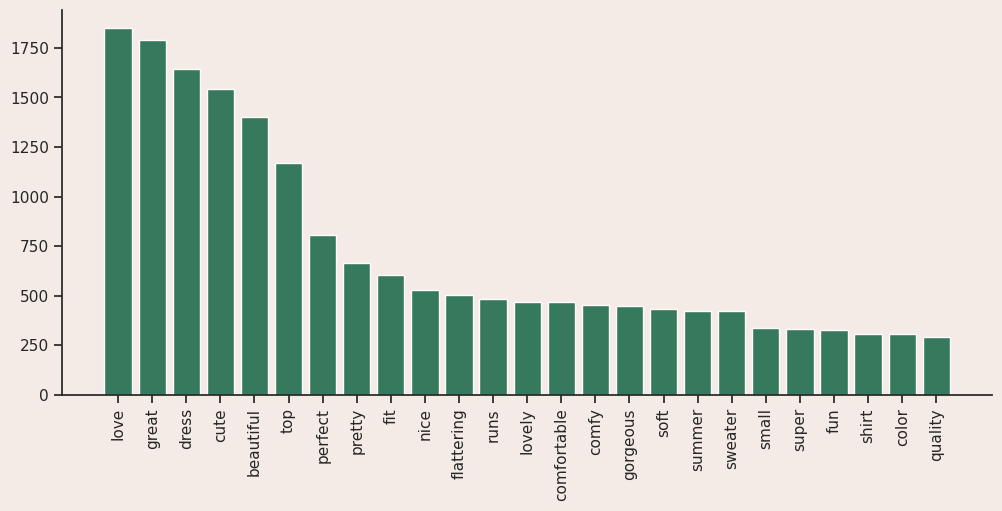

In [74]:
fig,ax = plt.subplots(1,1,figsize=(12,5))
plt.xticks(rotation = 90)
ax.bar(x=words, height=counts, color=GREEN);

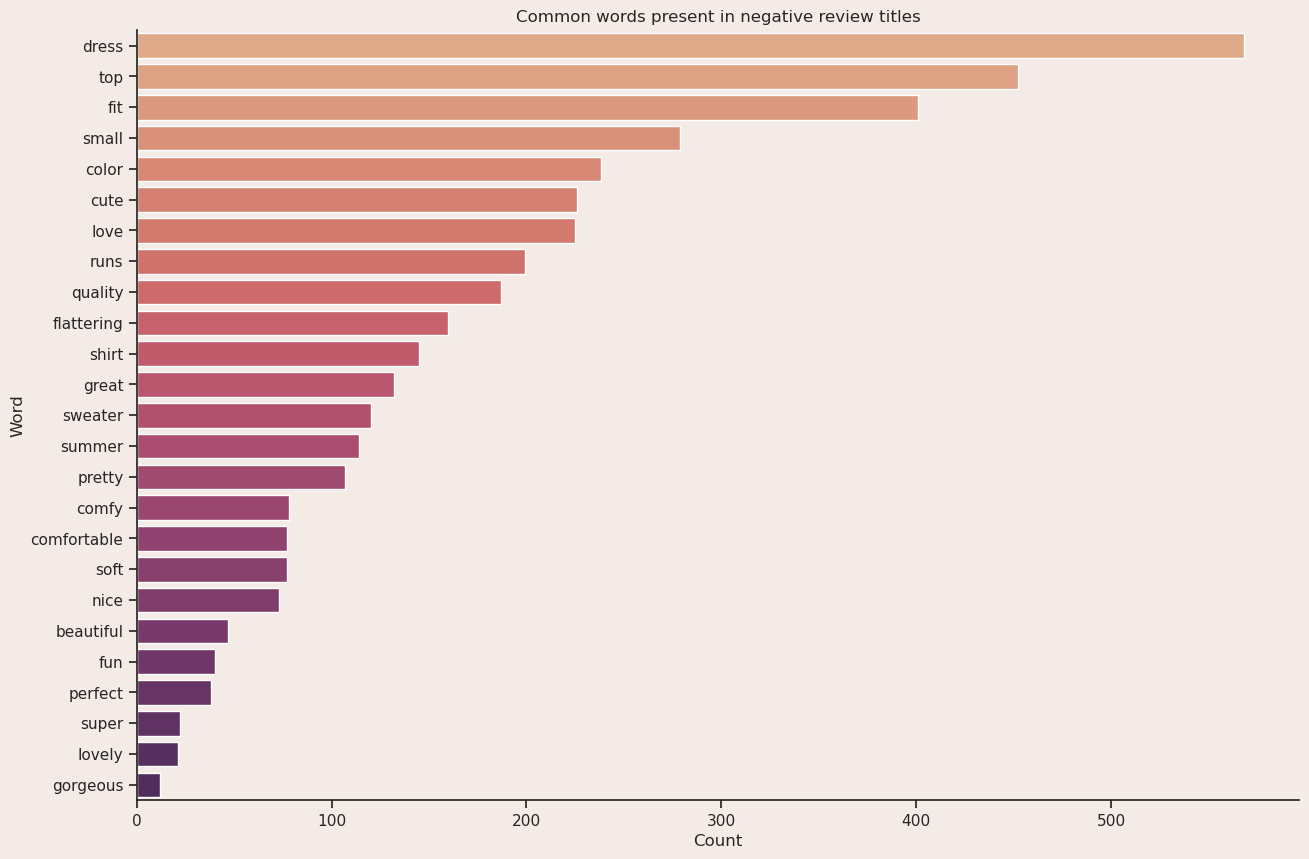

In [75]:
_has_review_df = has_review_df.loc[has_review_df['title'].notnull(), has_review_df.columns]
for w in words:
    _has_review_df[w] = _has_review_df['title'].apply(lambda x: int(w in x))

_has_review_df = _has_review_df[list(words) + ['label']]
_has_review_df = _has_review_df.groupby('label').sum().reset_index()
_has_review_df = pd.melt(_has_review_df, id_vars=['label'], value_vars=list(words))

plt.figure(figsize=(15,10))
bp = sns.barplot(data=_has_review_df[_has_review_df['label']==0].sort_values(by = 'value',ascending = False), 
                 x='value', 
                 y='variable', 
                 palette='flare',
            )
bp.set(xlabel='Count', ylabel='Word')
bp.set(title='Common words present in negative review titles')
plt.show()

del _has_review_df

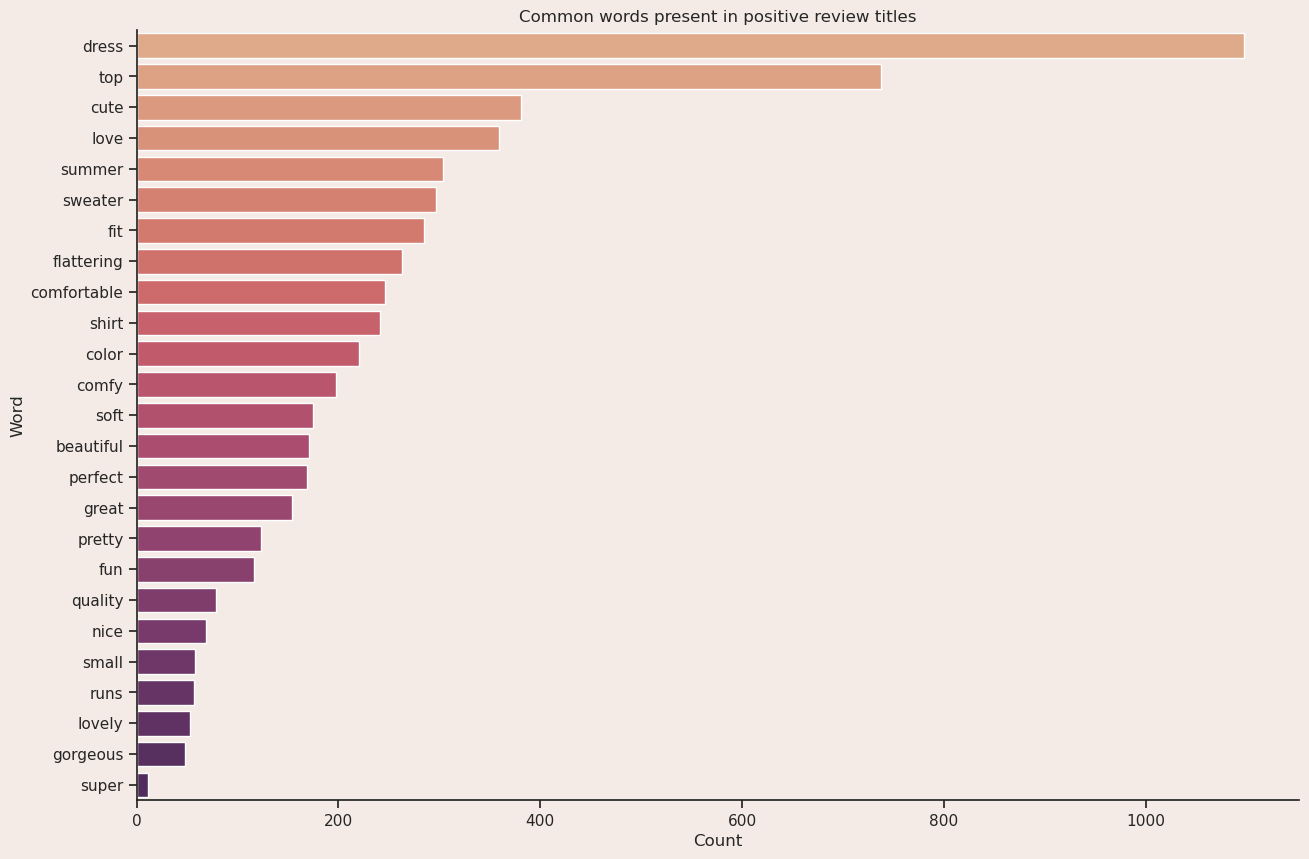

In [76]:
_has_review_df = has_review_df.loc[has_review_df['title'].notnull(), has_review_df.columns]
for w in words:
    _has_review_df[w] = _has_review_df['title'].apply(lambda x: int(w in x))

_has_review_df = _has_review_df[list(words) + ['label']]
_has_review_df = _has_review_df.groupby('label').sum().reset_index()
_has_review_df = pd.melt(_has_review_df, id_vars=['label'], value_vars=list(words))

plt.figure(figsize=(15,10))
bp = sns.barplot(data=_has_review_df[_has_review_df['label']==1].sort_values(by = 'value',ascending = False), 
                 x='value', 
                 y='variable', 
                 palette='flare',
            )
bp.set(xlabel='Count', ylabel='Word')
bp.set(title='Common words present in positive review titles')
plt.show()

del _has_review_df

## Task 2: Scoping Out a Machine Learning Project

Welcome to the Project Manager task for the sentiment analysis classifier project. As a Data Scientist, you know that a successful project requires not only technical skills but also effective project management. In this task, you will take on the role of a Data Scientist tasked with leading the development of a sentiment analysis classifier. You will be responsible for planning and executing the project, ensuring that it aligns with business goals, stays within scope, and delivers value to stakeholders.

To do this, you will create a one-page document that outlines the business value of the project, its scope, how to measure and monitor success, and when to quit. This task is designed to challenge you to think holistically about the project, and to consider not only the technical details but also the broader context in which the project is situated. Good luck!

Suggestion: Spend 1-2 hours on this section.

Fill in the section below with your answers!

### 1. The business value

A sentiment analysis classifier can have several positive outcomes in different business metrics:
<br>

* Sales & customer satisfaction: by developing an understanding of both positive and negative characteristics associated with different items, we can tailor the new products to be sold in the future to better satisfy customer needs, thus increasing the probability of an item having higher acceptance among customers and increasing the demand for our products. 

* Brand reputation & market share: by listening to our customers and quickly adapting to their preferences we can stay ahead of competitors by developing a reputation of selling high quality products that are widely prefered by customers.

* Marketing: The sentiment classifier can help the business identify the key drivers of positive sentiment among customers. These drivers can be used to inform marketing campaigns and messaging, which can help to increase customer acquisition and retention.

* Risk mitigation and product development: when developing new experimental products, we can take into consideration previously collected knowledge by our model to make better informed decisions and market testing.

### 2. The scope

The project would have to go through the following stages:

* Definition of initial goals: As implied in the above section, we not only aim for a model that can classify reviews into positive and negative classes, because for items with enough sales volume data, we can infer a lot of that information anyways. Instead, we also aim for a model which can explain the reasons why some items get bad and good reviews. This will allow us to make improvements in the future. 

* Baseline model development: this stage involves collecting, processing, and validating the available data, experimenting with a few candidate models, selecting and optimizing a model for the classification task, and evaluate predictive performance.

* Testing business impact: if we have a model with satisfactory predictive performance, and that we can use in some way to get some information about product flaws and strengths, we select a strategy to validate if the project is potentially valuable according to what was described in the above section. There are some tests we can do according to the available budget. We can start testing with the lowest costs possible (without including new products yet), for example, by applying an A/B test in our advertising where we emphazise characteristics associated to positive reviews for the test group, and a generic campaign for the control group. Alternatively, we could choose some of the worst performing products and modify them to remove bad characteristics discovered by the model, and measure if there is a lift in sales. 

* Future steps: if the tests are succesful, we can start planning about improving our model, trying to come up with other additional (potentially more complex) applications for the model, or integrating it with new models (e.g. sales forecasting or recommendation systems) in more complex pipelines to be tested.

### 3. How to measure success 

* We can evaluate success if there is a lift in sales from any of the experiments from the above section. We should contrast the lift (if any) to the model predictive performance to try to evaluate if more accurate models could potentially yield even better business results.

### 4. How to monitor success

* We should be making sure that as new reviews are sent in, especially if those reviews correspond to new products, our model can correctly predict their label. Additionaly, we should monitor the performance of our products in the market and see if the sales data aligns with the goals of the decisions informed by the model outputs.

* We should quit if the effort/costs put into developing the model are expected to surpass the potential benefits of developing it, according to the preferences and goals of the company. For example, one option could be to use some criteria such as: if the costs of developing and mantaining the model exceed X amount of expected additional sales revenue for the next T amount of time.

### Great job completing Task 2! 

Why do you think it is important to create a one-page document prior to beginning work on the project?

-It can give you a lot of perspective on the end goals of building a model and optimize the work for the right goals.

## Task 3: Baseline Machine Learning Flow

A basic baseline in a machine learning model is the simplest possible model that can be used to make predictions on the dataset. The basic baseline can be as simple as predicting the most frequent class for a classification problem or the mean value of the target variable for a regression problem. The purpose of establishing a baseline is to provide a benchmark for evaluating the performance of more complex models. A model that cannot outperform the basic baseline is considered to be useless and should not be used in practice.

Here you will need to convert the code from above that was used to perform preprocessing and EDA on the dataset and create a Flow to run in order to train a baseline model. 

**NOTE:** It is important to realise that this is being run as a separate file and therefore re-using functions from above will not work. 

Suggestion: Spend 2-4 hours on this section. Rememeber that the more organized your earlier work is, the easier it is to write flows!

In [ ]:
%%writefile baseline_flow.py 
from metaflow import FlowSpec, step, Flow, current, Parameter, IncludeFile, card, current
from metaflow.cards import Table, Markdown, Artifact

# TODO move your labeling function from earlier in the notebook here
labeling_function = lambda row: 0

class BaselineNLPFlow(FlowSpec):

    # We can define input parameters to a Flow using Parameters
    # More info can be found here https://docs.metaflow.org/metaflow/basics#how-to-define-parameters-for-flows
    split_size = Parameter('split-sz', default=0.2)
    # In order to use a file as an input parameter for a particular Flow we can use IncludeFile
    # More information can be found here https://docs.metaflow.org/api/flowspec#includefile
    data = IncludeFile('data', default='../data/Womens Clothing E-Commerce Reviews.csv')

    @step
    def start(self):

        # Step-level dependencies are loaded within a Step, instead of loading them 
        # from the top of the file. This helps us isolate dependencies in a tight scope.
        import pandas as pd
        import io 
        from sklearn.model_selection import train_test_split
        
        # load dataset packaged with the flow.
        # this technique is convenient when working with small datasets that need to move to remove tasks.
        df = pd.read_csv(io.StringIO(self.data))

        # filter down to reviews and labels 
        df.columns = ["_".join(name.lower().strip().split()) for name in df.columns]
        df['review_text'] = df['review_text'].astype('str')
        _has_review_df = df[df['review_text'] != 'nan']
        reviews = _has_review_df['review_text']
        labels = _has_review_df.apply(labeling_function, axis=1)
        # Storing the Dataframe as an instance variable of the class
        # allows us to share it across all Steps
        # self.df is referred to as a Data Artifact now
        # You can read more about it here https://docs.metaflow.org/metaflow/basics#artifacts
        self.df = pd.DataFrame({'label': labels, **_has_review_df})
        del df
        del _has_review_df

        # split the data 80/20, or by using the flow's split-sz CLI argument
        _df = pd.DataFrame({'review': reviews, 'label': labels})
        self.traindf, self.valdf = train_test_split(_df, test_size=self.split_size)
        print(f'num of rows in train set: {self.traindf.shape[0]}')
        print(f'num of rows in validation set: {self.valdf.shape[0]}')

        self.next(self.baseline)

    @step
    def baseline(self):
        "Compute the baseline"
        
        ### TODO: Fit and score a baseline model on the data, log the acc and rocauc as artifacts.
        self.base_acc = 0.0
        self.base_rocauc = 0.0

        self.next(self.end)
        
    @card(type='corise') # TODO: after you get the flow working, chain link on the left side nav to open your card!
    @step
    def end(self):

        msg = 'Baseline Accuracy: {}\nBaseline AUC: {}'
        print(msg.format(
            round(self.base_acc,3), round(self.base_rocauc,3)
        ))

        current.card.append(Markdown("# Womens Clothing Review Results"))
        current.card.append(Markdown("## Overall Accuracy"))
        current.card.append(Artifact(self.base_acc))

        current.card.append(Markdown("## Examples of False Positives"))
        # TODO: compute the false positive predictions where the baseline is 1 and the valdf label is 0. 
        # TODO: display the false_positives dataframe using metaflow.cards
        # Documentation: https://docs.metaflow.org/api/cards#table
        
        current.card.append(Markdown("## Examples of False Negatives"))
        # TODO: compute the false positive predictions where the baseline is 0 and the valdf label is 1. 
        # TODO: display the false_negatives dataframe using metaflow.cards

if __name__ == '__main__':
    BaselineNLPFlow()

In [ ]:
! python baseline_flow.py run

### Great job completing Task 3!

The project for Week 1 is completed but you are free to try out Task 4 below if you have the time to do so! Remember that completing Task 4 is not a requirement and completely optional. So far we have got you already building basic Machine Learning Pipelines uing Metaflow, what do you think about it so far?

## Task 4: A Good First Machine Learning Model Flow(OPTIONAL)
### Great now that we have established a baseline score for our dataset, let's try to create an actual model for this. 

You are free to experiment and try to get a very high score in terms of model metrics such as Accuracy/AUC but bear in-mind that usually in the real-world we have to prioritise quick iterations in order to gather quick feedback. Its important to also think about how you will be serving the model as well, more complex DNN will require GPU's in order to perform inference whereas simpler models will work fine on CPU's. 

1. What model do you think would do a good enough job to get the ball rolling?
2. Try creating a `GoodFirstModelNLPFlow` Flow. 
3. Can you verify that the `GoodFirstModelNLPFlow` is indeed better than the `BaselineNLPFlow`? Metaflow has a Client API which you can use to assert that this more complex model is indeed better. You can refer to the documentation [here](https://docs.metaflow.org/metaflow/client). 
4. Did your `GoodFirstModelNLPFlow` do better than the `BaselineNLPFlow`? If yes, why do you think so? If not, what do you think was the reason?
5. Why do you think it is important to prioritise quick iterations when working on an ML project?